In [204]:
import pandas as pd
import numpy as np

In [205]:
data = pd.read_csv('Bengaluru_House_Data.csv')
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [206]:
data.shape

(13320, 9)

In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [208]:
# Checking null values presnet in the dataset
data.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [209]:
# Filling missing values 
data['location'].fillna(data['location'].mode()[0], inplace=True) # Categorical Column
data['bath'].fillna(data['bath'].median(), inplace=True)
data['balcony'].fillna(data['balcony'].median(), inplace=True)
data['size'].fillna(data['size'].mode()[0], inplace=True) # Categorical Column

In [210]:
data.isnull().sum()

area_type          0
availability       0
location           0
size               0
society         5502
total_sqft         0
bath               0
balcony            0
price              0
dtype: int64

Text(0.5, 1.0, 'Area Type & Price')

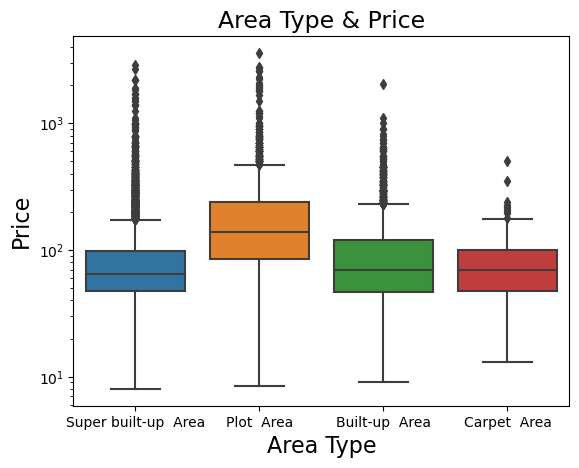

In [211]:
# Plot to show different Area Type and Price comparision
import matplotlib.pyplot as plt
import seaborn as sns
plt.yscale('log')
ax = sns.boxplot(x='area_type',y='price',data=data)
ax.set_xlabel('Area Type',fontdict={'fontsize':16})
ax.set_ylabel('Price',fontdict={'fontsize':16})
ax.set_title('Area Type & Price',fontdict={'fontsize':17})

In [212]:
# Let's check the 
data['availability'].value_counts()

availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64

In [213]:
data.drop(columns=['area_type', 'society', 'availability'], axis=1, inplace=True)

In [214]:
# Fixing 'size' colunn.
data['bhk'] = data['size'].str.split().str.get(0).astype(int)

In [215]:
# Dropping the size columnn as it is not required anymore
data.drop(columns='size', inplace=True)

In [216]:
# There are some values that have a hyphen '-' in them in 'total_sqft' column
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [217]:
# Defining a function to fix 'total_sqft' column
def convertRange(x):
    temp = x.split('-')
    if len(temp) == 2:
        return (float(temp[0])+float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [218]:
data['total_sqft'] = data['total_sqft'].apply(convertRange)

In [219]:
data.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2


In [220]:
# converting 'bath' & 'balcony' column to int type
data['bath'] = data['bath'].astype('int')
data['balcony'] = data['balcony'].astype('int')

# Price per square feet

In [221]:
data['price_per_sqft'] = data['price']*100000/data['total_sqft']

In [222]:
data.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2,1,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5,3,120.00,4,4615.384615
2,Uttarahalli,1440.0,2,3,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3,1,95.00,3,6245.890861
4,Kothanur,1200.0,2,1,51.00,2,4250.000000


In [223]:
data.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,1.603378,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,0.803067,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,0.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,1.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,2.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3.000000,3600.000000,43.000000,1.200000e+07


In [224]:
data['location'].value_counts()

location
Whitefield                        541
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [225]:
data['location'] = data['location'].apply(lambda x: x.strip() if isinstance(x, str) else x)
location_count = data.location.value_counts()

In [226]:
location_count_l10 = location_count[location_count<=10]
location_count_l10

location
Dairy Circle                      10
Nagappa Reddy Layout              10
Basapura                          10
1st Block Koramangala             10
Sector 1 HSR Layout               10
                                  ..
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
singapura paradise                 1
Abshot Layout                      1
Name: count, Length: 1053, dtype: int64

In [227]:
data['location'] = data['location'].apply(lambda x: 'other' if x in location_count_l10 else x)

In [228]:
data.location.value_counts()

location
other                 2885
Whitefield             542
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: count, Length: 242, dtype: int64

In [229]:
data.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,1.603378,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,0.803067,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,0.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,1.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,2.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3.000000,3600.000000,43.000000,1.200000e+07


In [230]:
(data['total_sqft']/data['bhk']).describe()

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

# Oulier Removal

In [231]:
# we are removing outliers beyond one standard deviation
def remove_outliers_sqft(df):
    df_output = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        gen_df=subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        df_output=pd.concat([df_output,gen_df], ignore_index=True)
    return df_output
data=remove_outliers_sqft(data)
data.describe()        

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,11488.000000,11488.000000,11488.000000,11488.000000,11488.000000,11488.000000
mean,1537.976810,2.605066,1.605066,105.238232,2.719185,6303.086658
std,1145.700742,1.208022,0.793965,138.520527,1.152969,3636.502296
min,250.000000,1.000000,0.000000,8.000000,1.000000,267.829813
25%,1100.000000,2.000000,1.000000,50.000000,2.000000,4285.714286
50%,1280.000000,2.000000,2.000000,70.000000,3.000000,5311.170467
75%,1660.000000,3.000000,2.000000,110.000000,3.000000,6849.601172
max,52272.000000,27.000000,3.000000,3600.000000,27.000000,53150.000000


In [232]:
def bhk_outlier_remover(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

In [233]:
# Calling the function
data=bhk_outlier_remover(data)

In [234]:
data.shape

(8040, 7)

In [235]:
data

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4,1,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3,2,194.0,3,11901.840491
2,1st Block Jayanagar,1200.0,6,2,125.0,6,10416.666667
3,1st Block Jayanagar,1875.0,2,3,235.0,3,12533.333333
4,1st Block Jayanagar,930.0,4,2,85.0,7,9139.784946
...,...,...,...,...,...,...,...
11479,other,1400.0,7,2,218.0,7,15571.428571
11482,other,1353.0,2,2,110.0,2,8130.081301
11483,other,812.0,1,0,26.0,1,3201.970443
11486,other,1200.0,5,2,325.0,4,27083.333333


In [236]:
# Dropping the 'price_per_sqft' column as it is not needed for the prediction
data.drop(columns='price_per_sqft', inplace=True)

# Cleaned Data

In [237]:
# Checking the cleaned data
data.head()

,location,total_sqft,bath,balcony,price,bhk
0,1st Block Jayanagar,2850.0,4,1,428.0,4
1,1st Block Jayanagar,1630.0,3,2,194.0,3
2,1st Block Jayanagar,1200.0,6,2,125.0,6
3,1st Block Jayanagar,1875.0,2,3,235.0,3
4,1st Block Jayanagar,930.0,4,2,85.0,7


In [238]:
# Exporting the cleaned data to csv for further use
data.to_csv('Cleaned_data.csv')

In [239]:
# Splitting the dataset into Feature and target column
X = data.drop(columns='price')
y = data['price']

In [240]:
# Checking the shape of X and y
X.shape, y.shape

((8040, 5), (8040,))

In [241]:
# Importing all the libraries required to build a pipeline and fit model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from sklearn.pipeline import make_pipeline

In [242]:
# Splitting data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [243]:
# Checking the shape of the train and test sets
print(X_train.shape)
print(X_test.shape)

(6432, 5)
(1608, 5)


# Applying Linear Regression

In [244]:
column_trans = make_column_transformer((OneHotEncoder(sparse=False), ['location']), remainder='passthrough') # Instanciating one hot encoder
scaler = StandardScaler() # Instanciating Standard Scaler
lr = LinearRegression() # Instanciating Linear Regression
pipe_lr = make_pipeline(column_trans, scaler, lr) # Making pipeline
pipe_lr.fit(X_train, y_train) # Fitting the pipeline

d:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [245]:
# Predicting on test set
y_pred_lr = pipe_lr.predict(X_test)

In [246]:
# Printing evaluation metrics for the model
print(f"R-square: {r2_score(y_pred_lr, y_test): .2f}")
print(f'MAPE: {mean_absolute_percentage_error(y_pred_lr, y_test): .2f}')

R-square:  0.47
MAPE:  0.85


# Applying Random Forrest

In [247]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
pipe_rfr = make_pipeline(column_trans, scaler, rfr)
pipe_rfr.fit(X_train, y_train)

d:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [248]:
# Predicting on test set
y_pred_rfr = pipe_rfr.predict(X_test)

In [249]:
# Printing evaluation metrics for the model
print(f"R-square: {r2_score(y_pred_rfr, y_test): .2f}")
print(f'MAPE: {mean_absolute_percentage_error(y_pred_rfr, y_test): .2f}')

R-square:  0.72
MAPE:  0.18


# Applying Adaboost

In [250]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
adaboost = AdaBoostRegressor()
pipe_ab = make_pipeline(column_trans, scaler, adaboost)
pipe_ab.fit(X_train, y_train)

d:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('adaboostregressor', AdaBoostRegressor())])

In [251]:
# Predicting on test set
y_pred_ab = pipe_ab.predict(X_test)

In [252]:
# Printing evaluation metrics for the model
print(f"R-square: {r2_score(y_pred_ab, y_test): .2f}")
print(f'MAPE: {mean_absolute_percentage_error(y_pred_ab, y_test): .2f}')

R-square: -0.25
MAPE:  0.63


# Applying Gradient Boost

In [253]:
gboost = GradientBoostingRegressor()
pipe_gb = make_pipeline(column_trans, scaler, gboost)
pipe_gb.fit(X_train, y_train)

d:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('gradientboostingregressor', GradientBoostingRegressor())])

In [254]:
# Predicting on test set
y_pred_gb = pipe_gb.predict(X_test)

In [255]:
# Printing results for the model
print(f"R-square: {r2_score(y_pred_gb, y_test): .2f}")
print(f'MAPE: {mean_absolute_percentage_error(y_pred_gb, y_test): .2f}')

R-square:  0.71
MAPE:  0.22


In [256]:
import pickle
pickle.dump(pipe_rfr, open('RandomForrest.pkl', 'wb'))